# 1. Run

In [76]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [77]:
pd.set_option('display.max_colwidth', -1)

In [78]:
tables = glob.glob('hyperparam_results/FirstRun/*.csv')
tables

['hyperparam_results/FirstRun/logisticregression_P1.csv',
 'hyperparam_results/FirstRun/randomforestclassifier_P1.csv',
 'hyperparam_results/FirstRun/decisiontreeclassifier_P1.csv',
 'hyperparam_results/FirstRun/linearsvc_P1.csv']

In [86]:
logreg_results = pd.read_csv('hyperparam_results/FirstRun/logisticregression_P1.csv').dropna()
svm_results = pd.read_csv('hyperparam_results/FirstRun/linearsvc_P1.csv').dropna()
dectree_results = pd.read_csv('hyperparam_results/FirstRun/decisiontreeclassifier_P1.csv').dropna()
randomforest_results = pd.read_csv('hyperparam_results/FirstRun/randomforestclassifier_P1.csv').dropna()

In [87]:
logreg_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
21,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.713492
17,"{'logisticregression__C': 7, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.709921
12,"{'logisticregression__C': 3, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.693968
20,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.691984
16,"{'logisticregression__C': 7, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.689048
13,"{'logisticregression__C': 3, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.685159
22,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.673651
9,"{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.667619
8,"{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.665159
4,"{'logisticregression__C': 0.5, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.656587


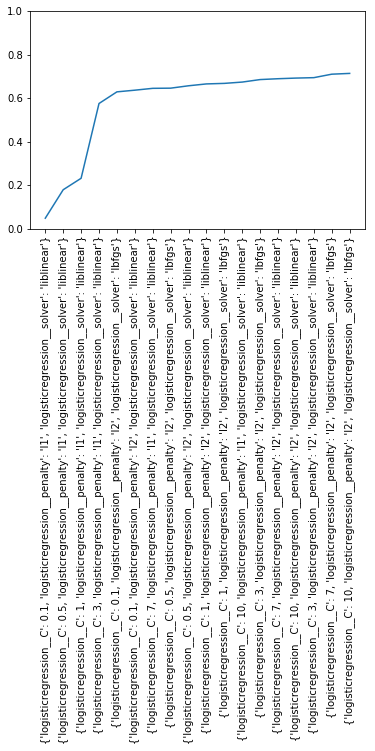

In [109]:
plot_df = logreg_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Logreg Results:

1. With increasing C-Value Scores improve. => Next run with C-Values in range 10-20
2. Solver lbfgs works best => remove other solver (liblinear)

In [68]:
svm_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
6,"{'linearsvc__C': 3, 'linearsvc__penalty': 'l2'}",0.716905
8,"{'linearsvc__C': 7, 'linearsvc__penalty': 'l2'}",0.705317
10,"{'linearsvc__C': 10, 'linearsvc__penalty': 'l2'}",0.705317
4,"{'linearsvc__C': 1, 'linearsvc__penalty': 'l2'}",0.695794
2,"{'linearsvc__C': 0.5, 'linearsvc__penalty': 'l2'}",0.664921
0,"{'linearsvc__C': 0.1, 'linearsvc__penalty': 'l2'}",0.662857
1,"{'linearsvc__C': 0.1, 'linearsvc__penalty': 'l1'}",NaN
3,"{'linearsvc__C': 0.5, 'linearsvc__penalty': 'l1'}",NaN
5,"{'linearsvc__C': 1, 'linearsvc__penalty': 'l1'}",NaN
7,"{'linearsvc__C': 3, 'linearsvc__penalty': 'l1'}",NaN


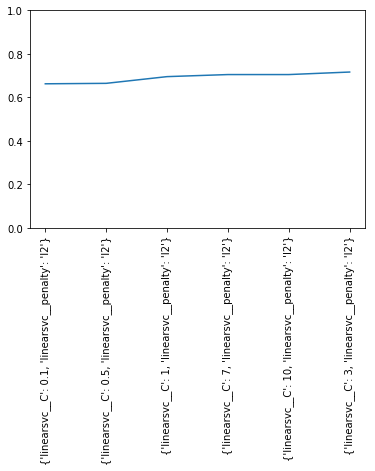

In [112]:
plot_df = svm_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### LinearSVC Results:

1. C Values 3,7 work best => Try with alues in that range
2. L1-Reg does not work => remove it

In [69]:
dectree_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][['params', 'mean_test_score']][:10]

,params,mean_test_score
2,"{'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.408889
64,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 2}",0.404180
31,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 20}",0.392275
69,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 5}",0.380084
24,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 2}",0.375000
43,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 20}",0.372871
14,"{'decisiontreeclassifier__max_depth': 100, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.370298
65,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}",0.369315
66,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 10}",0.362566
41,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}",0.355847


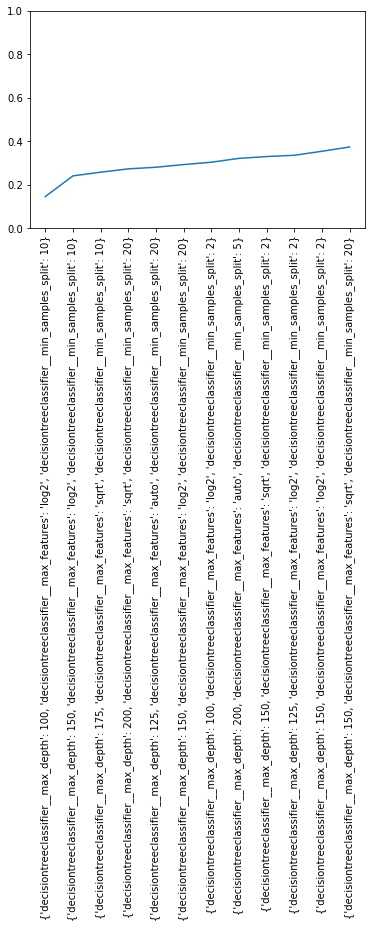

In [115]:
plot_df = dectree_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df)))[::5], plot_df.mean_test_score[::5])
plt.xticks(list(range(len(plot_df)))[::5], list(map(str, plot_df.params))[::5], rotation=90)
plt.ylim(0,1)
plt.show()

### DecTree Results:
1. Does not work will in general
2. Try min_samples split greateer than 10

In [70]:
randomforest_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
3,{'randomforestclassifier__n_estimators': 1000},0.785635
2,{'randomforestclassifier__n_estimators': 400},0.767460
1,{'randomforestclassifier__n_estimators': 100},0.708333
0,{'randomforestclassifier__n_estimators': 5},0.320404


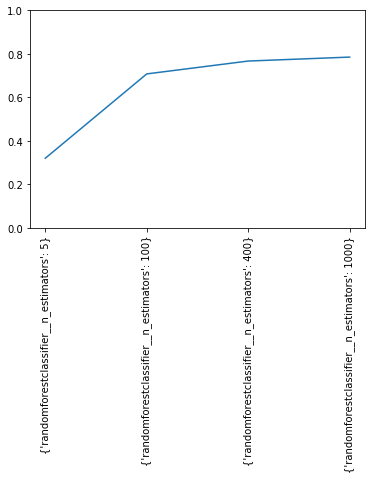

In [116]:
plot_df = randomforest_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Randomforest-Results:

1. Perfoamnce increases with number of estimator=> Try with more than thousand estimators and values between 400, 1000